In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv("./olist_df.csv")

print(df.tail())


def read_data():
    df = pd.read_csv("./olist_df.csv")

    df["order_estimated_delivery_date"] = pd.to_datetime(
        df["order_estimated_delivery_date"]
    )
    df["order_delivered_customer_date"] = pd.to_datetime(
        df["order_delivered_customer_date"]
    )

    df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
    df["deliver_date_diff"] = (
        df["order_estimated_delivery_date"] - df["order_delivered_customer_date"]
    )
    df["deliver_date_diff"] = df["deliver_date_diff"].dt.days
    df["order_purchase_timestamp"] = df["order_purchase_timestamp"].dt.month
    return df


# def calculate_days_difference(d1,d2):

#     difference = d1 - d2
#     return difference.days

       Unnamed: 0                          order_id  order_item_id  \
97911       97911  fffc94f6ce00a00581880bf54a75a037              1   
97912       97912  fffcd46ef2263f404302a634eb57f7eb              1   
97913       97913  fffce4705a9662cd70adb13d4a31832d              1   
97914       97914  fffe18544ffabc95dfada21779c9644f              1   
97915       97915  fffe41c64501cc87c801fd61db3f6244              1   

                             product_id                         seller_id  \
97911  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
97912  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
97913  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
97914  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
97915  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

       shipping_limit_date   price  freight_value  payment_sequential  \
97911  2018-05-02 04:11:01  299.99         

In [2]:
df = read_data()

In [3]:
print(df.isnull().sum())

Unnamed: 0                           0
order_id                             0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
review_id                            0
review_score                         0
review_comment_title             86454
review_comment_message           57655
review_creation_date                 0
review_answer_timestamp              0
product_category_name             1405
product_name_lenght               1405
product_description_lenght        1405
product_photos_qty                1405
product_weight_g                    16
product_length_cm                   16
product_height_cm                   16
product_width_cm         

In [4]:
df = df.dropna(axis="index")

In [5]:
print(df.isnull().sum())

Unnamed: 0                       0
order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_id                      0
order_status                     0
order_purchase_times

In [6]:
df["deliver_date_diff"]

12       21.0
16        3.0
27        6.0
46        0.0
49       11.0
         ... 
97836   -17.0
97840    20.0
97851    25.0
97873    19.0
97881    15.0
Name: deliver_date_diff, Length: 9437, dtype: float64

In [7]:
# df2 = pd.read_csv("data/olist_order_reviews_dataset.csv")

# # print(df2.isnull().sum())
# # print(df2.head())

# df2.info()

In [8]:
# df_diff = pd.merge(df, df2, how="outer", on="order_id")

# df_diff

In [9]:
df["deliver_date_diff"].sort_values()

202     -61.0
3773    -53.0
44363   -51.0
96565   -50.0
68163   -50.0
         ... 
89370    49.0
67026    50.0
94767    52.0
77071    52.0
43114    54.0
Name: deliver_date_diff, Length: 9437, dtype: float64

In [10]:
df[["review_score", "deliver_date_diff"]].isnull().sum()

review_score         0
deliver_date_diff    0
dtype: int64

In [11]:
df = df.dropna(axis=0, subset=["review_score", "deliver_date_diff"])

In [12]:
df[["review_score", "deliver_date_diff"]]

,review_score,deliver_date_diff
12,5,21.0
16,1,3.0
27,5,6.0
46,1,0.0
49,4,11.0
...,...,...
97836,1,-17.0
97840,5,20.0
97851,4,25.0
97873,3,19.0


In [13]:
df["review_score"].value_counts()

review_score
5    5365
1    1527
4    1418
3     710
2     417
Name: count, dtype: int64

In [14]:
df.loc[:, "deliver_date_diff_score"] = pd.qcut(
    df["deliver_date_diff"],
    q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
)

In [15]:
df["deliver_date_diff_score"].sort_values()

75938     1
28181     1
83095     1
28273     1
44167     1
         ..
72814    10
34545    10
12946    10
46193    10
28817    10
Name: deliver_date_diff_score, Length: 9437, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

<Axes: xlabel='deliver_date_diff_score', ylabel='review_score'>

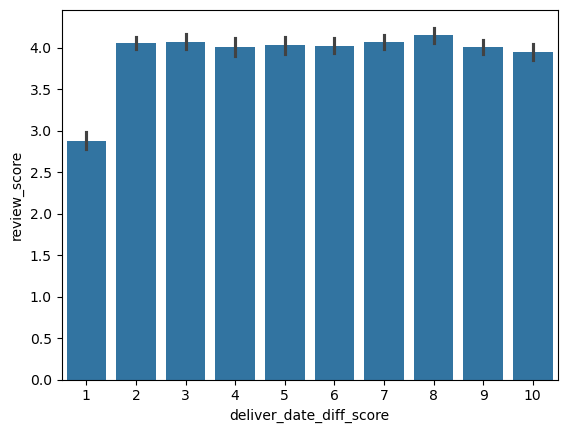

In [16]:
sns.barplot(df, x="deliver_date_diff_score", y="review_score")

배송일 차이 계층 == 1(배송 차이 하위 10%) 일때가 확연히 별점이 낮았다.

"배송일 차이가 클수록 고객 만족도(별점)는 낮아진다."
설명: 예상 배송일과 실제 배송일의 차이가 커질수록, 고객의 기대와 실제 경험 간의 차이가 커지며, 이는 고객의 불만으로 이어져 별점이 낮아진다.

In [17]:
df2 = df.loc[df["deliver_date_diff_score"] == 1, ["deliver_date_diff", "review_score"]]
df2

,deliver_date_diff,review_score
46,0.0,1
93,0.0,5
97,0.0,5
198,-3.0,1
202,-61.0,4
...,...,...
97491,-8.0,1
97501,-13.0,5
97670,0.0,4
97699,-10.0,1


In [18]:
df3 = pd.DataFrame(df2)
px.histogram(df3, df2["deliver_date_diff"], color=df2["review_score"])

In [19]:
df4 = df.loc[df["deliver_date_diff_score"] == 10, ["deliver_date_diff", "review_score"]]
df4

,deliver_date_diff,review_score
115,40.0,5
187,27.0,5
368,30.0,5
393,31.0,4
469,30.0,3
...,...,...
97554,28.0,2
97684,33.0,4
97744,26.0,5
97835,28.0,5


In [20]:
df5 = pd.DataFrame(df4)

px.histogram(df5, df4["deliver_date_diff"], color=df4["review_score"])

성수기와 비성수기에 따라 배송일 차이가 고객 만족도에 미치는 영향이 다르다."
설명: 성수기(예: 블랙프라이데이, 연말연시)에는 배송 지연이 더 자주 발생할 수 있으며, 이러한 시기에는 고객의 기대 수준이 다를 수 있다.

In [21]:
df6 = df.loc[
    df["deliver_date_diff_score"] == 1,
    ["deliver_date_diff", "review_score", "order_purchase_timestamp"],
]
df6["order_purchase_timestamp"].sort_values()

42230     2
19684     2
32235     2
8722      2
29041     3
         ..
63816     8
64676     8
66020     8
30972    12
39853    12
Name: order_purchase_timestamp, Length: 966, dtype: int32

In [22]:
df7 = pd.DataFrame(df6)

px.histogram(df7, df6["order_purchase_timestamp"], color=df6["review_score"])